In [1]:
import os
import pandas as pd
import datetime
import backtrader as bt
from strategy import *
from dotenv import load_dotenv
import alpha_vantage as av
from alpha_vantage.alphavantage import AlphaVantage
from alpha_vantage.timeseries import TimeSeries as ts

In [2]:
load_dotenv()

True

In [3]:
### Uncomment the below only if we are using intraday minute price quotes from AV

# # Setup AV API
# av_api_key=os.getenv("ALPHAVANTAGE_API_KEY")
# av_api='https://www.alphavantage.co/query?'

# # Create time-series query
# ts_query=ts(key=av_api_key,output_format='csv')

# # Set query input variables
# interval='1min'
# period=60
# outputsize='full'


symbol='TSLA'

In [4]:
### Uncomment the below only if we are using intraday minute price quotes from AV

# # Get time-series minute data from AV
# data_ts,meta_data_ts=ts_query.get_intraday(symbol=symbol,
#                                            interval=interval,
#                                            outputsize=outputsize,
# )
# # Create time-series DataFrame
# ts_df=pd.DataFrame.from_dict(data_ts)
# ts_df.drop(index=ts_df.index[0], axis=0, inplace=True)
# ts_df.head()

In [5]:
### Uncomment the below only if we are using intraday minute price quotes from AV

# # Output data for ticker to .csv file
# ts_df.to_csv((f'{symbol}'+'_data.csv'),index=True)

## Run GoldenCross Strategy

position size: 0
2017-12-19, Buy 149 shares of stock at 66.22
2017-12-20, TSLA   Order:   1	Type: Buy  	Status Accepted 	Size:  149.0000 Price:   66.2200 Position: 149
2017-12-20, TSLA   Order:   1	Type: Buy  	Status Completed 	Size:  149.0000 Price:   66.2200 Position: 149
2017-12-20, TSLA   BUY   Price:  66.54 Cost: 9914.46 Comm: 0.00 Size:  149.0000 
2017-12-27, Sell 149 shares of stock at 62.33
2017-12-28, TSLA   Order:   2	Type: Sell 	Status Accepted 	Size: -149.0000 Price:   62.3300 Position: 0
2017-12-28, TSLA   Order:   2	Type: Sell 	Status Completed 	Size: -149.0000 Price:   62.3300 Position: 0
2017-12-28, TSLA   SELL  Price:  62.35 Cost: 9914.46 Comm: 0.00 Size: -149.0000 
2017-12-28, TSLA Closed: PnL Gross -624.31, Net -624.3,
2018-01-11, Buy 137 shares of stock at 67.59
2018-01-12, TSLA   Order:   3	Type: Buy  	Status Accepted 	Size:  137.0000 Price:   67.5900 Position: 137
2018-01-12, TSLA   Order:   3	Type: Buy  	Status Completed 	Size:  137.0000 Price:   67.5900 Position

<IPython.core.display.Javascript object>


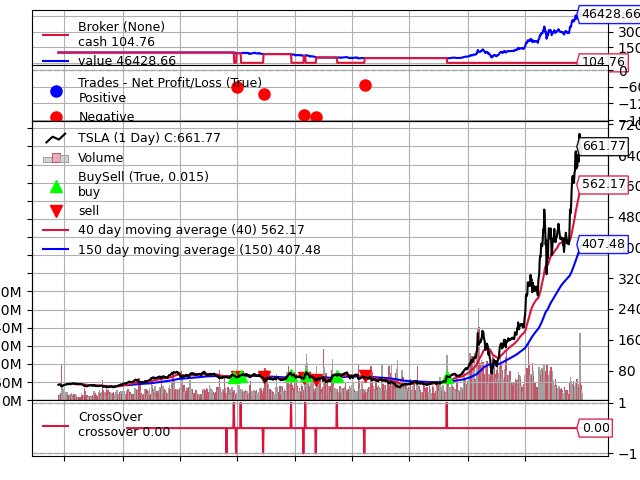

Starting Portfolio Value: 10000.000000
Final Portfolio Value: 46428.660000
PnL: 36428.66


In [6]:
# Instantiate Cerebro engine:
cerebro = bt.Cerebro()

## Uncommment to run on historical intraday minute data from AlphaVantage
# data = bt.feeds.GenericCSVData(
#         dataname=f'{symbol}_data.csv',
#         datetime=1,
#         fromdate=datetime.datetime(2021, 6, 1),
#         timeframe=bt.TimeFrame.Minutes,
#         dtformat=('%Y-%m-%d %H:%M:%S'),
#         open=2,
#         high=3,
#         low=4,
#         close=5,
#         volume=6,
#         reverse=True)

#Uncomment below to test on daily historic prices exported from Yahoo Finance
data = bt.feeds.YahooFinanceCSVData(
    dataname='TSLA.csv',
    fromdate=datetime.datetime(2016, 6, 14),
    todate=datetime.datetime(2020, 12, 25)
)

cerebro.adddata(data)

# Add strategy to Cerebro:
cerebro.addstrategy(GoldCross)

# Save backtest data to a CSV file
cerebro.addwriter(bt.WriterFile, csv=True, out=f'{symbol}_gc_data.csv')

# Default position size:
cerebro.addsizer(bt.sizers.SizerFix, stake=3)

if __name__ == '__main__':
    # Run Cerebro Engine:
    start_portfolio_value = cerebro.broker.getvalue()

    cerebro.run()
    cerebro.plot()
    
    end_portfolio_value = cerebro.broker.getvalue()
    pnl = end_portfolio_value - start_portfolio_value
    
    print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
    print(f'Final Portfolio Value: {end_portfolio_value:2f}')
    print(f'PnL: {pnl:.2f}')

In [7]:
cerebro.runstop()

## Run MACrossover strategy

2016-09-02 SELL CREATE 39.560000
2016-09-06 SELL EXECUTED, 39.80
2016-09-13 CLOSE CREATE 39.210000
2016-09-14 BUY EXECUTED, 39.15
2016-12-21 BUY CREATE 41.540000
2016-12-22 BUY EXECUTED, 41.64
2016-12-30 CLOSE CREATE 42.740000
2017-01-03 SELL EXECUTED, 42.97
2017-03-21 SELL CREATE 50.140000
2017-03-22 SELL EXECUTED, 50.31
2017-03-29 CLOSE CREATE 55.480000
2017-03-30 BUY EXECUTED, 55.61
2017-03-31 BUY CREATE 55.660000
2017-04-03 BUY EXECUTED, 57.38
2017-04-10 CLOSE CREATE 62.480000
2017-04-11 SELL EXECUTED, 62.68
2017-07-21 SELL CREATE 65.680000
2017-07-24 SELL EXECUTED, 66.05
2017-07-31 CLOSE CREATE 64.690000
2017-08-01 BUY EXECUTED, 64.60
2017-08-23 BUY CREATE 70.550000
2017-08-24 BUY EXECUTED, 70.50
2017-08-31 CLOSE CREATE 71.180000
2017-09-01 SELL EXECUTED, 71.22
2017-10-13 SELL CREATE 71.110000
2017-10-16 SELL EXECUTED, 70.75
2017-10-23 CLOSE CREATE 67.400000
2017-10-24 BUY EXECUTED, 67.76
2017-12-26 BUY CREATE 63.460000
2017-12-27 BUY EXECUTED, 63.20
2018-01-04 CLOSE CREATE 62.920

<IPython.core.display.Javascript object>


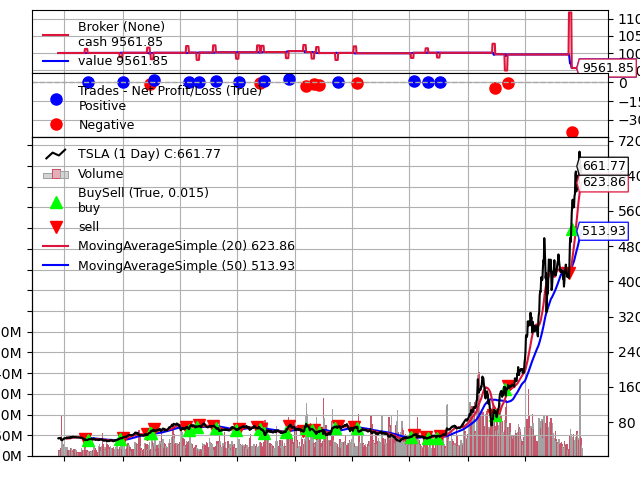

Starting Portfolio Value: 10000.000000
Final Portfolio Value: 9561.850000
PnL: -438.15


In [8]:
# Instantiate Cerebro engine:
cerebro = bt.Cerebro()

## Uncommment to run on historical intraday minute data from AlphaVantage
# data = bt.feeds.GenericCSVData(
#         dataname=f'{symbol}_data.csv',
#         datetime=1,
#         fromdate=datetime.datetime(2021, 6, 1),
#         timeframe=bt.TimeFrame.Minutes,
#         dtformat=('%Y-%m-%d %H:%M:%S'),
#         open=2,
#         high=3,
#         low=4,
#         close=5,
#         volume=6,
#         reverse=True)

#Uncomment below to test on daily historic prices exported from Yahoo Finance
data = bt.feeds.YahooFinanceCSVData(
    dataname='TSLA.csv',
    fromdate=datetime.datetime(2016, 6, 14),
    todate=datetime.datetime(2020, 12, 25)
)

cerebro.adddata(data)

# Add strategy to Cerebro:
cerebro.addstrategy(MAcrossover)

# Default position size:
cerebro.addsizer(bt.sizers.SizerFix, stake=3)

# Save backtest data to a CSV file
cerebro.addwriter(bt.WriterFile, csv=True, out=f'{symbol}_mac_data.csv')

if __name__ == '__main__':
    # Run Cerebro Engine:
    start_portfolio_value = cerebro.broker.getvalue()

    cerebro.run()
    cerebro.plot()
    
    end_portfolio_value = cerebro.broker.getvalue()
    pnl = end_portfolio_value - start_portfolio_value
    
    print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
    print(f'Final Portfolio Value: {end_portfolio_value:2f}')
    print(f'PnL: {pnl:.2f}')